In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


We'll continue to make use of the fuel economy dataset in this workspace.

In [2]:
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


### **Task 1**: 
Plot the distribution of combined fuel mileage (column 'comb', in miles per gallon) by manufacturer (column 'make'), for all manufacturers with at least eighty cars in the dataset. Consider which manufacturer order will convey the most information when constructing your final plot. 

**Hint**: Completing this exercise will take multiple steps! Add additional code cells as needed in order to achieve the goal.

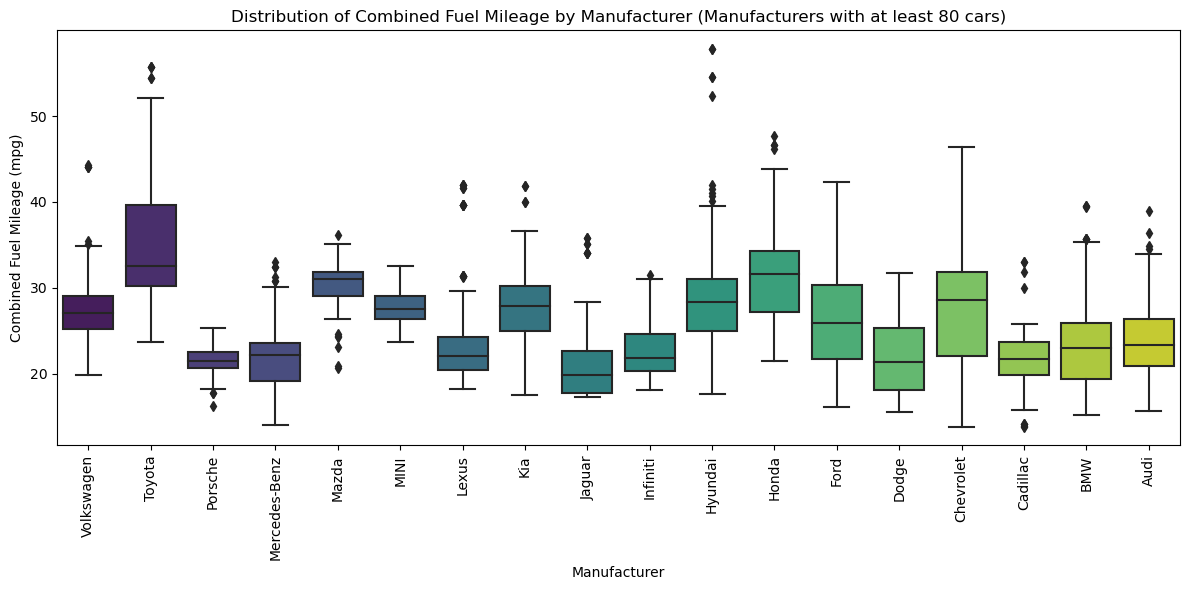

In [3]:
# Filter out manufacturers with at least eighty cars
manufacturer_counts = fuel_econ['make'].value_counts()
manufacturers_with_at_least_eighty_cars = manufacturer_counts[manufacturer_counts >= 80].index
fuel_econ_filtered = fuel_econ[fuel_econ['make'].isin(manufacturers_with_at_least_eighty_cars)]


# Create the plot using seaborn
plt.figure(figsize=(12, 6))
sb.boxplot(data=fuel_econ_filtered, x='make', y='comb', 
           order=manufacturers_with_at_least_eighty_cars.sort_values(ascending=False), #===>> We Can Neglect (ascending=False) To get same as bellow figure
           palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Manufacturer')
plt.ylabel('Combined Fuel Mileage (mpg)')
plt.title('Distribution of Combined Fuel Mileage by Manufacturer (Manufacturers with at least 80 cars)')
plt.tight_layout()
plt.show()


### **Task 2**: 
Continuing on from the previous task, plot the mean fuel efficiency for each manufacturer with at least 80 cars in the dataset.  Can you use error bars?

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16124\3893548070.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sb.barplot(data=fuel_econ_filtered, x='make', y='comb', ci='sd', order=manufacturers_with_at_least_eighty_cars, palette='viridis')


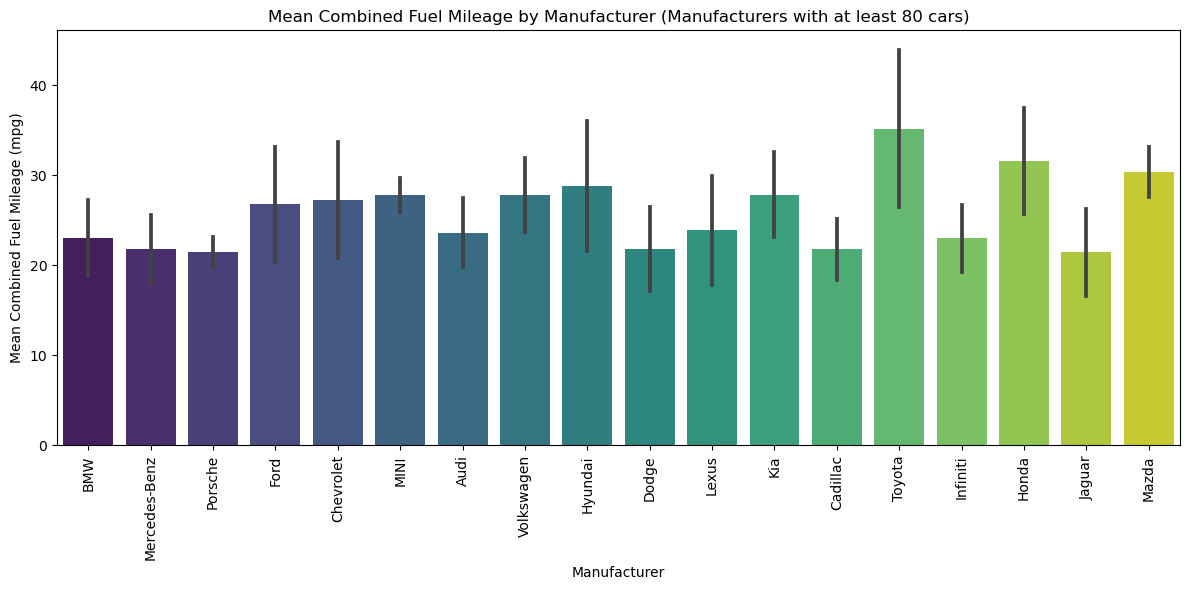

In [4]:
manufacturer_stats = fuel_econ.groupby('make')['comb'].agg(['mean', 'std'])

# Filter out manufacturers with at least eighty cars
manufacturers_with_at_least_eighty_cars = fuel_econ['make'].value_counts()[fuel_econ['make'].value_counts() >= 80].index
manufacturer_stats_filtered = manufacturer_stats.loc[manufacturers_with_at_least_eighty_cars]

# Create the plot with error bars using seaborn
plt.figure(figsize=(12, 6))
sb.barplot(data=fuel_econ_filtered, x='make', y='comb', ci='sd', order=manufacturers_with_at_least_eighty_cars, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Manufacturer')
plt.ylabel('Mean Combined Fuel Mileage (mpg)')
plt.title('Mean Combined Fuel Mileage by Manufacturer (Manufacturers with at least 80 cars)')
plt.tight_layout()
plt.show()